In [19]:
import json
import matplotlib.pyplot as plt
from statistics import mean, variance
import numpy as np
import re

from kp.utils.constants import EXPERIMENTS_DIR

In [43]:
EXPERIMENT_NAME = "Fake Movies, Real Actors (Full Patch)"
EXPERIMENT_DIR = re.sub(r"[^\w]", "_", EXPERIMENT_NAME).lower().replace("__","_").rstrip("_")
RESULTS_DIR = EXPERIMENTS_DIR / EXPERIMENT_DIR
FIGURES_DIR = RESULTS_DIR / "figures"
FIGURES_DIR.mkdir(exist_ok=True)
results_paths = RESULTS_DIR.rglob("*.json")

In [44]:
TOP_K = 10
forgotten_tokens = {}
results = []
for results_path in results_paths:
    with open(results_path, "r") as f:
        data = json.load(f)

    dropout_rate = data["experiment_settings"]["patch_dropout"]

    target_probs = [
        ex["target"]["token_prob"]
        for ex in data["results"]
        if "target" in ex and "token_prob" in ex["target"]
    ]

    # TODO: Set this up with some sort of top k setup
    accuracy = [
        int(ex["target"]["token_idx"] == ex["top_predictions"][0]["token_id"])
        for ex in data["results"]
    ]

    avg_prob = mean(target_probs)
    avg_accuracy = mean(accuracy)
    var_prob = variance(target_probs)

    results.append({
        "dropout_rate": dropout_rate,
        "avg_prob": avg_prob,
        "var_prob": var_prob,
        "avg_accuracy": avg_accuracy,
    })

    lowest_k = sorted(data["results"], key=lambda ex: ex["target"]["token_prob"])[:TOP_K]

    forgotten_tokens[dropout_rate] = lowest_k


In [45]:
forgotten_tokens

{0.1: [{'ex_id': 276,
   'dropout': {'layers': [14, 16]},
   'top_predictions': [{'token_id': 26263,
     'token': ' Andy',
     'probability': 0.3696550130844116},
    {'token_id': 152765,
     'token': 'Ilustra',
     'probability': 0.10541941225528717},
    {'token_id': 7430, 'token': ' Ali', 'probability': 0.05769019573926926},
    {'token_id': 10698, 'token': ' Jim', 'probability': 0.04189752787351608},
    {'token_id': 8352, 'token': ' Bill', 'probability': 0.027020730078220367},
    {'token_id': 15841, 'token': ' Anna', 'probability': 0.024931984022259712},
    {'token_id': 4828, 'token': ' Dan', 'probability': 0.02209280990064144},
    {'token_id': 17943,
     'token': ' Philip',
     'probability': 0.021930960938334465},
    {'token_id': 29349, 'token': ' Emma', 'probability': 0.020974142476916313},
    {'token_id': 19400,
     'token': ' Sarah',
     'probability': 0.019534917548298836},
    {'token_id': 20315, 'token': ' Tony', 'probability': 0.017168739810585976},
    {'tok

In [48]:
forgotten_tokens[.1]

[{'ex_id': 276,
  'dropout': {'layers': [14, 16]},
  'top_predictions': [{'token_id': 26263,
    'token': ' Andy',
    'probability': 0.3696550130844116},
   {'token_id': 152765,
    'token': 'Ilustra',
    'probability': 0.10541941225528717},
   {'token_id': 7430, 'token': ' Ali', 'probability': 0.05769019573926926},
   {'token_id': 10698, 'token': ' Jim', 'probability': 0.04189752787351608},
   {'token_id': 8352, 'token': ' Bill', 'probability': 0.027020730078220367},
   {'token_id': 15841, 'token': ' Anna', 'probability': 0.024931984022259712},
   {'token_id': 4828, 'token': ' Dan', 'probability': 0.02209280990064144},
   {'token_id': 17943,
    'token': ' Philip',
    'probability': 0.021930960938334465},
   {'token_id': 29349, 'token': ' Emma', 'probability': 0.020974142476916313},
   {'token_id': 19400, 'token': ' Sarah', 'probability': 0.019534917548298836},
   {'token_id': 20315, 'token': ' Tony', 'probability': 0.017168739810585976},
   {'token_id': 17769, 'token': ' Matt', 'p

In [50]:
for res in forgotten_tokens[.1]:
    print(res["target"]["token_prob"])
    print(res["dropout"])

1.0171126163527333e-09
{'layers': [14, 16]}
3.7195960089775326e-08
{'layers': [15]}
5.62790830826998e-07
{'layers': []}
9.138083214565995e-07
{'layers': [3, 13, 14]}
1.6374867755075684e-06
{'layers': [12]}
2.05396895580634e-06
{'layers': [13, 14]}
2.227841832791455e-06
{'layers': [12, 15]}
2.9882760372856865e-06
{'layers': [5]}
6.915683115948923e-06
{'layers': [16]}
9.676956324256025e-06
{'layers': []}


In [12]:
results

[{'dropout_rate': 0.1,
  'avg_prob': 0.7358630349966965,
  'var_prob': 0.1356864138765741,
  'avg_accuracy': 0.812},
 {'dropout_rate': 0.9,
  'avg_prob': 0.0018812561667917364,
  'var_prob': 6.155249964303091e-05,
  'avg_accuracy': 0.003},
 {'dropout_rate': 0.8,
  'avg_prob': 0.011330587729912835,
  'var_prob': 0.00492001196250405,
  'avg_accuracy': 0.026},
 {'dropout_rate': 0.3,
  'avg_prob': 0.5452080679554405,
  'var_prob': 0.18354469300296208,
  'avg_accuracy': 0.641},
 {'dropout_rate': 0.7,
  'avg_prob': 0.043444807635861844,
  'var_prob': 0.025818676565083278,
  'avg_accuracy': 0.078},
 {'dropout_rate': 0.5,
  'avg_prob': 0.2632643563336518,
  'var_prob': 0.1429846691071358,
  'avg_accuracy': 0.364},
 {'dropout_rate': 0.0,
  'avg_prob': 0.7937964601869533,
  'var_prob': 0.11413817402629464,
  'avg_accuracy': 0.851},
 {'dropout_rate': 0.4,
  'avg_prob': 0.4005674738144237,
  'var_prob': 0.17787350759333356,
  'avg_accuracy': 0.508},
 {'dropout_rate': 1.0,
  'avg_prob': 0.001286087

In [13]:
dropout_rates = [r["dropout_rate"] for r in results]
avg_probs = [r["avg_prob"] for r in results]
std_devs = [np.sqrt(r["var_prob"]) for r in results]  # std = sqrt(variance)
avg_accuracies = [r["avg_accuracy"] for r in results]

sorted_data = sorted(zip(dropout_rates, avg_probs, std_devs, avg_accuracies))
x, y, yerr, z = zip(*sorted_data)

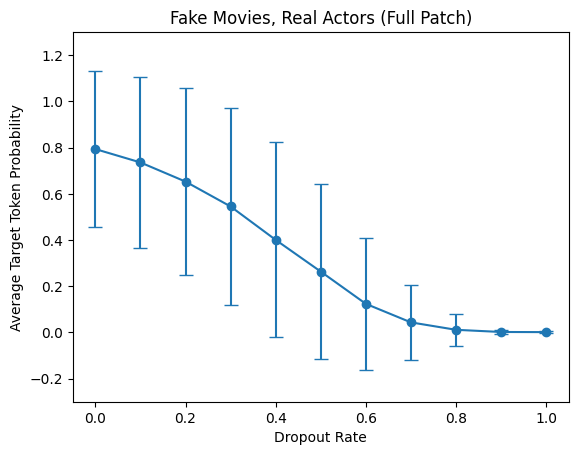

In [26]:
plt.errorbar(x, y, yerr=yerr, fmt='o-', capsize=5)
plt.xlabel("Dropout Rate")
plt.ylabel("Average Target Token Probability")
plt.title(EXPERIMENT_NAME)
plt.ylim(-0.3, 1.3)
plt.savefig(FIGURES_DIR / "dropout_vs_prob.png", dpi=300, bbox_inches="tight")
plt.show()

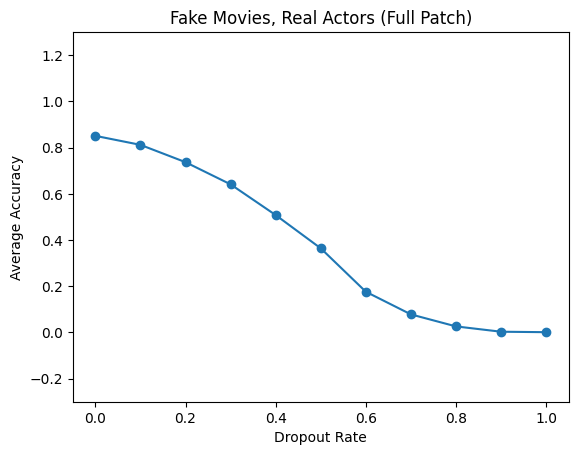

In [27]:
plt.errorbar(x, z, fmt='o-', capsize=5)
plt.xlabel("Dropout Rate")
plt.ylabel("Average Accuracy")
plt.title(EXPERIMENT_NAME)
plt.ylim(-0.3, 1.3)
plt.savefig(FIGURES_DIR / "dropout_vs_accuracy.png", dpi=300, bbox_inches="tight")
plt.show()